In [3]:
import numpy as np
import torch
import tifffile
from pathlib import Path
import time
import os
import torch.nn as nn
import torch.optim as optim

PROJECT_ROOT = Path("/mnt/home/dchhantyal/3d-cnn-classification")
import sys
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
sys.path.append(str(PROJECT_ROOT))

In [4]:
from model import ConvRNN, Config, resize_volume, NucleusDataset, DataLoader, RandomAugmentation3D

In [5]:
DATA_ROOT_DIR = (
    "/mnt/home/dchhantyal/3d-cnn-classification/data/nuclei_state_dataset"  #
)

config = Config() 

In [6]:
# 1. Initialize Model, Loss, and Optimizer
model = ConvRNN(num_classes=config.num_classes).to(config.device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)

In [7]:
# 2. Prepare DataLoaders
full_dataset = NucleusDataset(root_dir=DATA_ROOT_DIR)

In [8]:
 # 1. Create a dataset for training WITH the augmentation transform
train_full_dataset = NucleusDataset(
    root_dir=DATA_ROOT_DIR, transform=RandomAugmentation3D()
)

# 2. Create a second dataset for validation WITHOUT the transform
val_full_dataset = NucleusDataset(root_dir=DATA_ROOT_DIR, transform=None)

# 3. Perform the stratified split on indices
labels = [sample[1] for sample in train_full_dataset.samples]
indices = list(range(len(train_full_dataset)))
train_indices, val_indices = train_test_split(
    indices, test_size=0.2, random_state=42, stratify=labels
)

# 4. Create Subsets using the correct dataset instance for each
train_dataset = Subset(train_full_dataset, train_indices)
val_dataset = Subset(val_full_dataset, val_indices)
# --- END OF MODIFICATION ---

train_loader = DataLoader(
    train_dataset, batch_size=config.batch_size, shuffle=True, num_workers=2
)
val_loader = DataLoader(
    val_dataset, batch_size=config.batch_size, shuffle=False, num_workers=2
)

print(f"Found {len(full_dataset)} total samples.")
print(
    f"Training on {len(train_dataset)} samples, validating on {len(val_dataset)} samples."
)
print(
    f"Model has {sum(p.numel() for p in model.parameters() if p.requires_grad):,} trainable parameters."
)

Found 605 total samples.
Training on 484 samples, validating on 121 samples.
Model has 97,731 trainable parameters.


In [10]:
from collections import Counter

In [11]:
Counter(labels)

Counter({0: 212, 1: 199, 2: 194})

In [14]:
from matplotlib import pyplot as plt

(array([0.00184719, 0.00184719, 0.0014367 , 0.00174457, 0.00164195,
        0.00153932, 0.00164195, 0.00174457, 0.00164195, 0.00164195,
        0.00153932, 0.00184719, 0.00174457, 0.00164195, 0.00184719,
        0.00153932, 0.00153932, 0.0014367 , 0.00153932, 0.00164195,
        0.00184719, 0.00153932, 0.00194981, 0.00164195, 0.0014367 ,
        0.00184719, 0.00123146, 0.00153932, 0.00184719, 0.00174457]),
 array([  0.        ,  20.13333333,  40.26666667,  60.4       ,
         80.53333333, 100.66666667, 120.8       , 140.93333333,
        161.06666667, 181.2       , 201.33333333, 221.46666667,
        241.6       , 261.73333333, 281.86666667, 302.        ,
        322.13333333, 342.26666667, 362.4       , 382.53333333,
        402.66666667, 422.8       , 442.93333333, 463.06666667,
        483.2       , 503.33333333, 523.46666667, 543.6       ,
        563.73333333, 583.86666667, 604.        ]),
 <BarContainer object of 30 artists>)

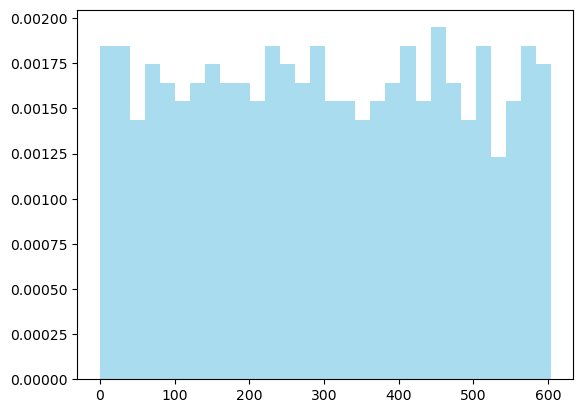

In [18]:
plt.hist(train_indices, bins=30, density=True, alpha=0.7, color='skyblue')

(array([0.00125219, 0.00083479, 0.00250438, 0.00125219, 0.00166959,
        0.00208699, 0.00166959, 0.00125219, 0.00208699, 0.00125219,
        0.00250438, 0.00083479, 0.00125219, 0.0004174 , 0.00166959,
        0.00292178, 0.00125219, 0.00208699, 0.00292178, 0.00208699,
        0.00083479, 0.00166959, 0.00083479, 0.00166959, 0.00083479,
        0.00250438, 0.00250438, 0.00292178, 0.00125219, 0.00166959]),
 array([  1. ,  20.8,  40.6,  60.4,  80.2, 100. , 119.8, 139.6, 159.4,
        179.2, 199. , 218.8, 238.6, 258.4, 278.2, 298. , 317.8, 337.6,
        357.4, 377.2, 397. , 416.8, 436.6, 456.4, 476.2, 496. , 515.8,
        535.6, 555.4, 575.2, 595. ]),
 <BarContainer object of 30 artists>)

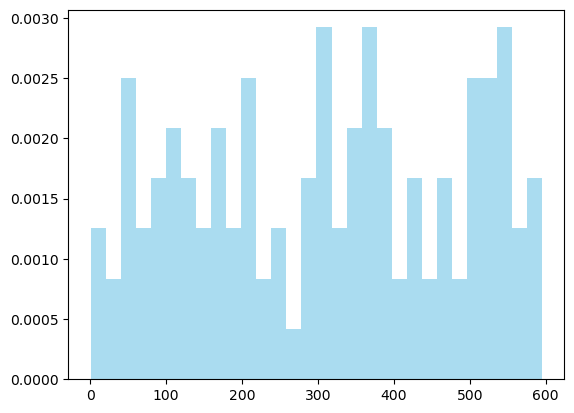

In [17]:
plt.hist(val_indices, bins=30, density=True, alpha=0.7, color='skyblue')